<a href="https://colab.research.google.com/github/Shiva0krishna/chatbot-finetuned-llm/blob/main/notebook8f8a742ed7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler
import tensorflow_hub as hub

In [62]:
df = pd.read_csv('Dataset of Diabetes .csv',usecols=['ID','Gender','AGE','Urea','Chol','BMI','CLASS'])

In [63]:
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df['CLASS'] = df['CLASS'].map({'Y': 1, 'N': 0})

In [71]:
df.dropna(inplace=True)


In [73]:
df.head()

,ID,Gender,AGE,Urea,Chol,BMI,CLASS
0,502,0.0,50,4.7,4.2,24.0,0.0
1,735,1.0,26,4.5,3.7,23.0,0.0
2,420,0.0,50,4.7,4.2,24.0,0.0
3,680,0.0,50,4.7,4.2,24.0,0.0
4,504,1.0,33,7.1,4.9,21.0,0.0


plt.hist(df.AGE,bins=20)
plt.xlabel('AGE')
plt.ylabel('Count')
plt.title('AGE Distribution')
plt.show()

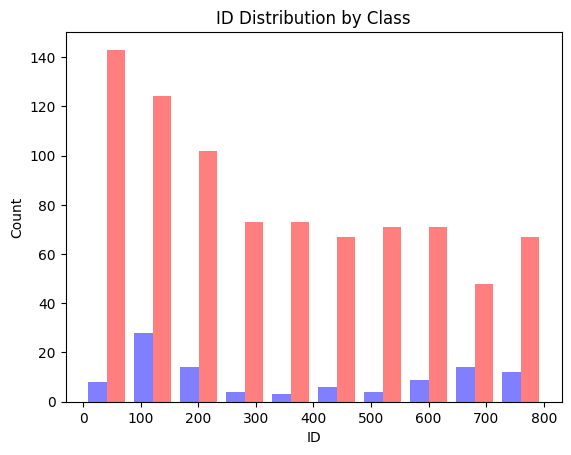

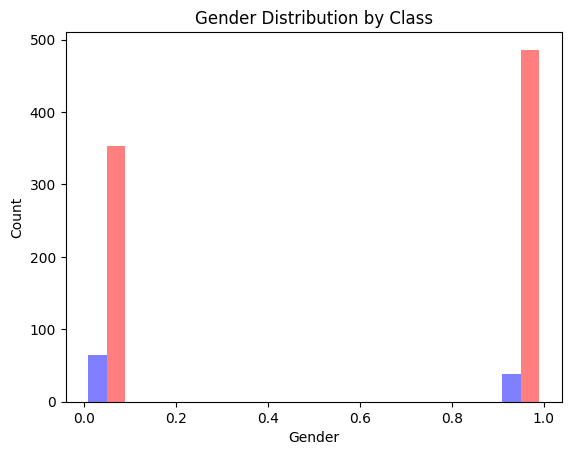

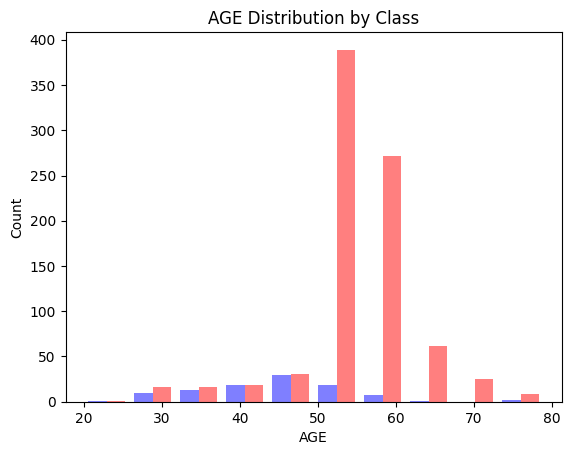

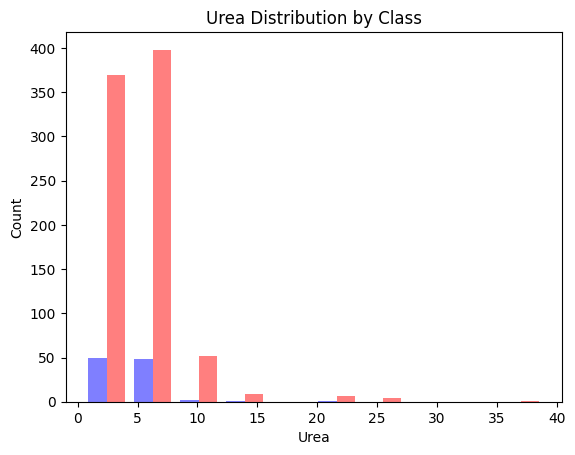

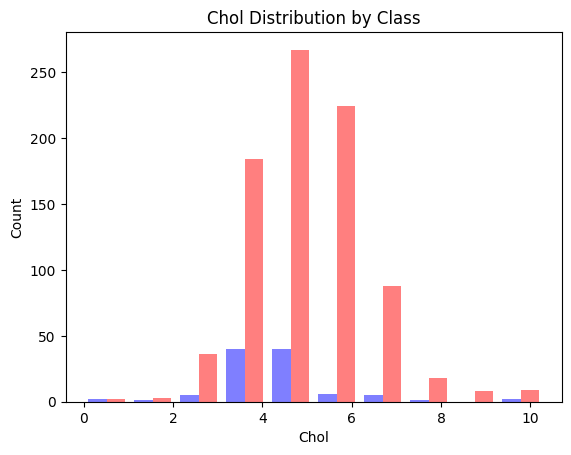

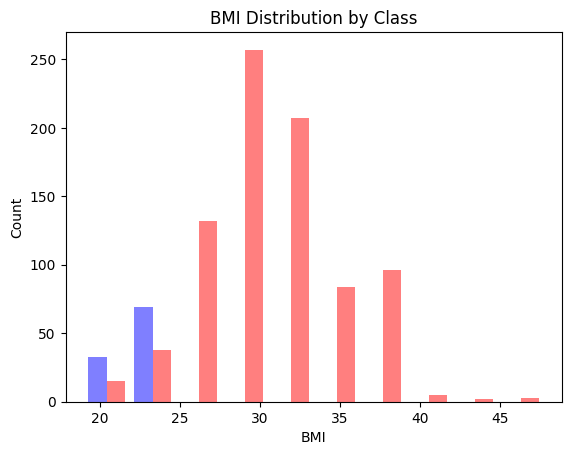

In [74]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist([df[df['CLASS']==0][label], df[df['CLASS']== 1][label]],
           color=['blue', 'red'],alpha=0.5, label=[0,1])
  plt.xlabel(label)
  plt.ylabel('Count')
  plt.title(f'{label} Distribution by Class')
  plt.show()

In [75]:
len(df[df['CLASS']== 1]),len(  df[df['CLASS']==0])

(839, 102)

In [76]:
x=df[df.columns[:-1]].values
y=df[df.columns[-1]].values

In [77]:
print(x,y)

[[502.    0.   50.    4.7   4.2  24. ]
 [735.    1.   26.    4.5   3.7  23. ]
 [420.    0.   50.    4.7   4.2  24. ]
 ...
 [198.    1.   28.    3.5   4.5  37. ]
 [199.    1.   69.   10.3   4.9  37. ]
 [200.    1.   71.   11.    7.5  30. ]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [87]:
x.shape,y.shape

((941, 6), (941,))

In [95]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [96]:
over = RandomOverSampler()
x, y = over.fit_resample(x, y)

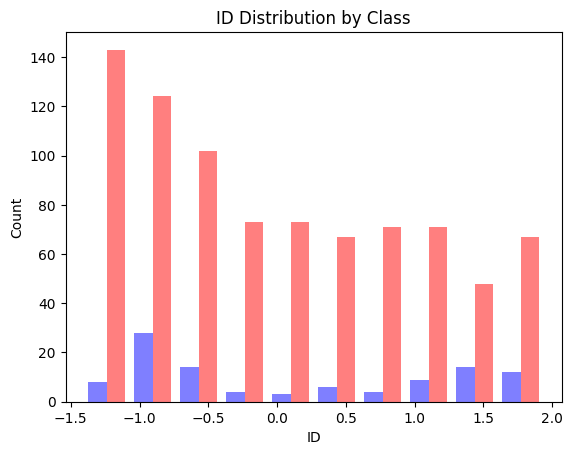

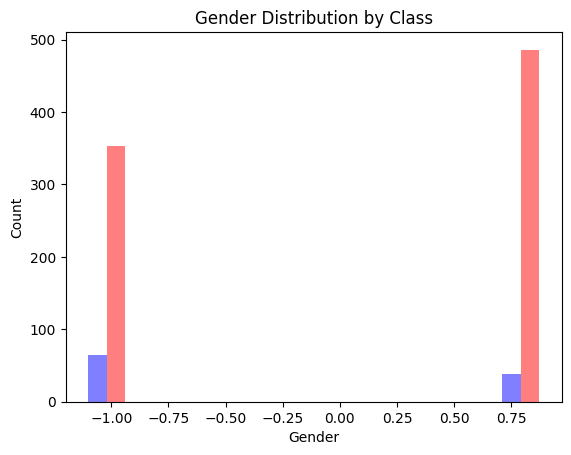

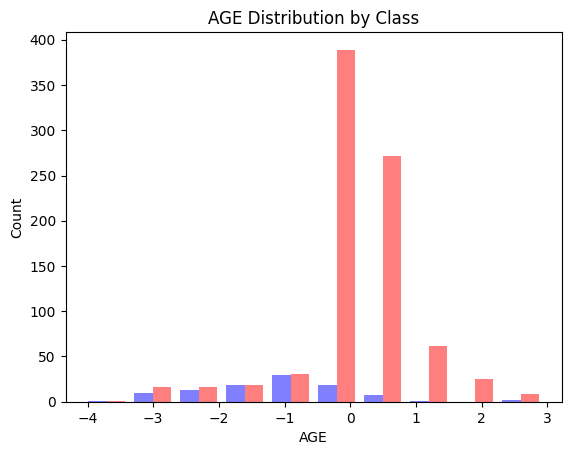

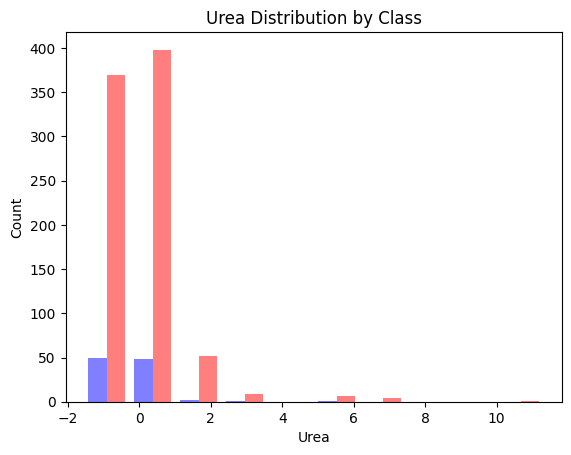

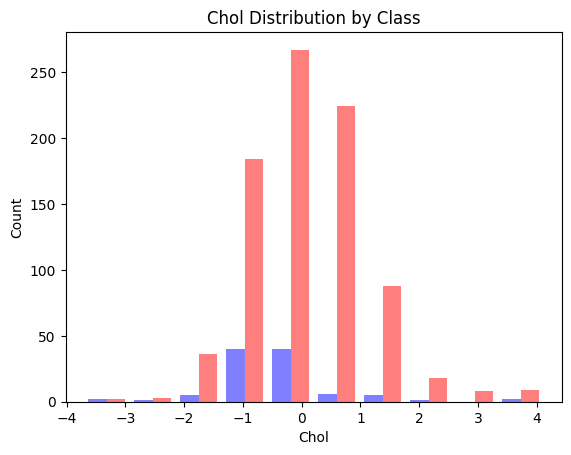

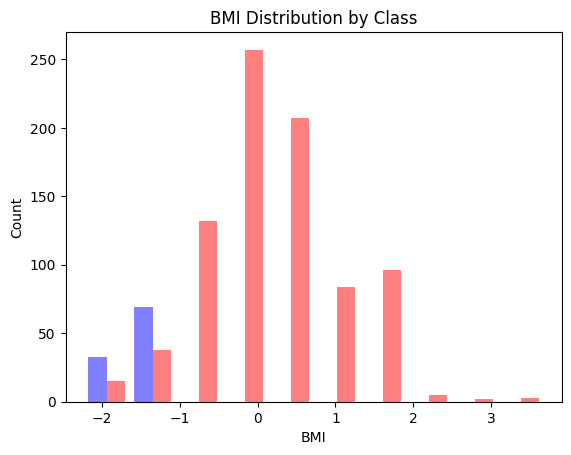

In [89]:
for i in range(len(transformed_df.columns[:-1])):
  label = transformed_df.columns[i]
  plt.hist([transformed_df[transformed_df['CLASS']==0][label], transformed_df[transformed_df['CLASS']== 1][label]],
           color=['blue', 'red'],alpha=0.5, label=[0,1])
  plt.xlabel(label)
  plt.ylabel('Count')
  plt.title(f'{label} Distribution by Class')
  plt.show()

In [98]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.4,random_state=0)
x_valid,x_test,y_valid,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=0)

In [97]:
len(transformed_df[transformed_df['CLASS']== 1]),len(  transformed_df[transformed_df['CLASS']==0])

(839, 839)

In [99]:
model =tf.keras.Sequential([
     tf.keras.layers.Dense(16,activation='relu'),
     tf.keras.layers.Dense(16,activation='relu'),
     tf.keras.layers.Dense(1,activation='sigmoid')
])

In [100]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [101]:
model.evaluate(x_train,y_train)

32/32 [==============================] - 0s 2ms/step - loss: 0.7067 - accuracy: 0.3688


[0.7067497968673706, 0.3687872886657715]

In [102]:
model.evaluate(x_valid,y_valid)

11/11 [==============================] - 0s 4ms/step - loss: 0.7075 - accuracy: 0.3720


[0.7074829339981079, 0.3720238208770752]

In [108]:
model.fit(x_train,y_train,epochs=20,batch_size=16,validation_data=(x_valid,y_valid))

Epoch 1/20
63/63 [==============================] - 0s 6ms/step - loss: 0.1098 - accuracy: 0.9682 - val_loss: 0.1182 - val_accuracy: 0.9702
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 0.1083 - accuracy: 0.9682 - val_loss: 0.1165 - val_accuracy: 0.9702
Epoch 3/20
63/63 [==============================] - 0s 3ms/step - loss: 0.1066 - accuracy: 0.9702 - val_loss: 0.1153 - val_accuracy: 0.9702
Epoch 4/20
63/63 [==============================] - 0s 3ms/step - loss: 0.1050 - accuracy: 0.9702 - val_loss: 0.1145 - val_accuracy: 0.9702
Epoch 5/20
63/63 [==============================] - 0s 3ms/step - loss: 0.1041 - accuracy: 0.9702 - val_loss: 0.1154 - val_accuracy: 0.9732
Epoch 6/20
63/63 [==============================] - 0s 3ms/step - loss: 0.1030 - accuracy: 0.9722 - val_loss: 0.1132 - val_accuracy: 0.9702
Epoch 7/20
63/63 [==============================] - 0s 3ms/step - loss: 0.1012 - accuracy: 0.9722 - val_loss: 0.1119 - val_accuracy: 0.9702
Epoch 8/20
63/63 [==

In [112]:
model.evaluate(x_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.0886 - accuracy: 0.9821


[0.08861096948385239, 0.9821428656578064]

In [115]:
encoder = tf.keras.layers.TextVectorization(max_tokens=20000, output_sequence_length=200)

texts = [
    "I am Your personalised medical teacher. Feel free to ask any thing .i would love to help you with ",
    "Keras is a high-level neural networks API."
]
labels = [0, 1]

x_train = tf.data.Dataset.from_tensor_slices((texts, labels))

encoder.adapt(x_train.map(lambda text, label: text))

encoded_texts = encoder(texts)
print(encoded_texts)


tf.Tensor(
[[ 3 24  4 10 13  9 20 19  2 21 23  8  3  6 14  2 18  5  7  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0]
 [15 16 25 17 11 12 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0


In [116]:
model.evaluate(x_test,y_test)

11/11 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.9821


[0.08861096948385239, 0.9821428656578064]

In [117]:
model.save('my-model')

In [124]:
import tensorflow as tf

model = tf.keras.models.load_model('my-model')

input_texts = [
    "Urea"
]

encoder = tf.keras.layers.TextVectorization(max_tokens=20000, output_sequence_length=6)
encoder.adapt(input_texts)

vectorized_inputs = encoder(input_texts)

predictions = model.predict(vectorized_inputs)

print(predictions)


1/1 [==============================] - 0s 63ms/step
[[0.9892697]]
